In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# To impute missing Values
from sklearn.impute import SimpleImputer

C:\Users\theam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

# for Interactive Shells
from IPython.display import display

In [4]:
data = pd.read_csv('Myocardial_infarction_complications.csv')

In [5]:
data.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(1700, 124)

In [7]:
# Total Missing Values
data.isnull().sum().sum()

15974

,KFK_BLOOD,IBS_NASL,S_AD_KBRIG,D_AD_KBRIG,NOT_NA_KB,LID_KB,NA_KB,NA_BLOOD,GIPER_NA,K_BLOOD,GIPO_K,AST_BLOOD,ALT_BLOOD,D_AD_ORIT,S_AD_ORIT,DLIT_AG,ROE,ritm_ecg_p_07,ritm_ecg_p_06,ritm_ecg_p_04,ritm_ecg_p_02,ritm_ecg_p_01,ritm_ecg_p_08,NOT_NA_3_n,NA_R_3_n,R_AB_3_n,TIME_B_S,L_BLOOD,n_r_ecg_p_08,n_p_ecg_p_07,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_08,n_r_ecg_p_10,n_p_ecg_p_05,n_p_ecg_p_04,n_p_ecg_p_03,n_p_ecg_p_01,n_p_ecg_p_12,n_r_ecg_p_09,n_r_ecg_p_06,n_r_ecg_p_05,n_r_ecg_p_04,n_r_ecg_p_03,n_r_ecg_p_02,n_r_ecg_p_01,n_p_ecg_p_11,n_p_ecg_p_06,NOT_NA_2_n,R_AB_2_n,NA_R_2_n,STENOK_AN,ant_im,lat_im,inf_im,FK_STENOK,post_im,ZSN_A,IBS_POST,nr_02,nr_03,nr_04,nr_07,nr_08,nr_01,nr_11,np_05,np_10,np_09,np_08
%age,99.760000,95.760000,63.290000,63.290000,40.350000,39.820000,38.650000,22.060000,22.060000,21.820000,21.710000,16.760000,16.710000,15.710000,15.710000,14.590000,11.940000,8.940000,8.940000,8.940000,8.940000,8.940000,8.940000,7.710000,7.710000,7.530000,7.410000,7.350000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.760000,6.470000,6.350000,6.350000,6.240000,4.880000,4.710000,4.710000,4.290000,4.240000,3.180000,3.000000,1.240000,1.240000,1.240000,1.240000,1.240000,1.240000,1.240000,1.060000,1.060000,1.060000,1.060000


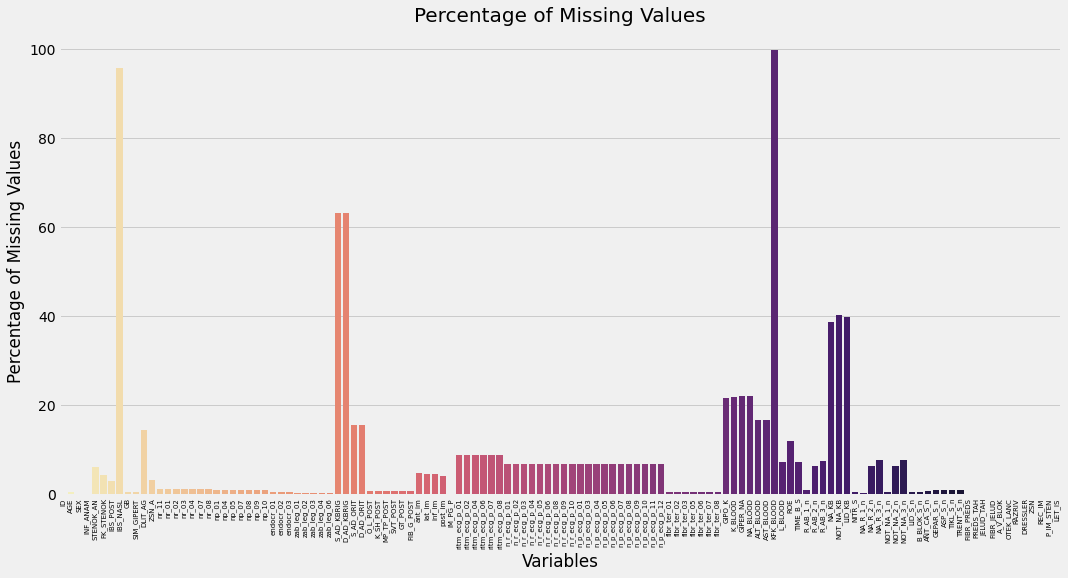

In [8]:
#printing only 70 columns with highest percentage of Null values
display(round((data.isnull().sum() / (len(data.index)) * 100) , 2).sort_values(ascending = False).head(70).to_frame().rename({0:'%age'}, axis = 1).T.style.background_gradient('magma_r'))
print()
missing = (data.isnull().sum() / (len(data.index)) * 100).to_frame().reset_index().rename({0:'%age'}, axis = 1)
ax = sns.barplot(missing['index'],missing['%age'], palette  = 'magma_r')
plt.title("Percentage of Missing Values", fontsize = 20)
plt.xticks(fontsize =7, rotation = 90)
plt.xlabel("Variables")
plt.ylabel("Percentage of Missing Values")
plt.show();

In [9]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(data))

# Imputation removed column names hence, getting back the names
df_imputed.columns = data.columns

# Checking the final dataset for missing values again.
df_imputed.isnull().sum().sort_values(ascending = False).to_frame().reset_index().rename({0:'Count'}, axis =1).head(70).T.style.background_gradient('magma_r')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
index,LET_IS,lat_im,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,inf_im,P_IM_STEN,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,zab_leg_03,zab_leg_02,zab_leg_01,endocr_03,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,R_AB_2_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n
Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df_imputed.isnull().sum()

ID           0
AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
            ..
DRESSLER     0
ZSN          0
REC_IM       0
P_IM_STEN    0
LET_IS       0
Length: 124, dtype: int64

In [11]:
df_imputed.describe().style.background_gradient(cmap='bone_r')

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.862353,0.626471,0.553529,2.234118,1.239412,1.155882,0.015882,1.396471,0.033529,3.290588,0.188235,0.024706,0.002353,0.011176,0.020588,0.017059,0.000588,0.002353,0.001176,0.001765,0.006471,0.000588,0.003529,0.001176,0.001765,0.134118,0.024706,0.007647,0.078824,0.071176,0.021765,0.005294,0.012941,138.864706,80.511765,133.867647,82.317647,0.064706,0.027059,0.067059,0.004706,0.004706,0.008824,1.542941,0.868235,0.967059,0.248235,0.029412,0.694706,0.055882,0.013529,0.000588,0.207647,0.027059,0.034118,0.004706,0.120000,0.040588,0.041176,0.018824,0.002353,0.001176,0.001176,0.001176,0.018824,0.002941,0.001176,0.015882,0.060000,0.004118,0.005882,0.020000,0.016471,0.045882,0.007647,0.009412,0.040000,0.002353,0.005294,0.003529,0.001176,0.314118,4.171471,0.017647,136.429412,0.464506,0.256388,1.600941,8.725347,13.033529,4.633529,0.312941,0.131765,0.071765,0.750000,0.815882,0.232941,0.114706,0.483529,0.088235,0.054118,0.330000,0.105882,0.078235,0.281765,0.126471,0.669412,0.717647,0.746471,0.017647,0.200588,0.100000,0.011765,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.233668,0.483883,0.836248,2.384571,1.030883,0.789756,0.125057,1.086809,0.180067,2.866096,0.649065,0.155273,0.048464,0.105157,0.142043,0.129529,0.024254,0.048464,0

In [12]:
df_imputed.corr()[['LET_IS']].T.style.background_gradient('copper_r')

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
LET_IS,0.504013,0.157607,-0.086326,0.069317,0.098268,0.085876,0.062337,-0.043872,0.083269,0.011372,0.081937,0.149192,-0.046735,0.000807,0.032145,0.015902,0.128793,-0.008378,-0.007982,0.025414,-0.004375,0.009307,-0.008378,0.000988,-0.011852,0.036208,0.067764,0.038305,-0.025427,-0.061513,0.116386,0.091485,-0.013458,-0.035775,-0.067150,-0.054777,-0.099019,-0.090616,0.106494,0.084126,0.125326,0.063362,-0.017524,0.058484,0.116191,0.081892,0.013413,0.006012,0.091101,-0.160337,0.129176,0.040647,-0.008378,0.098259,0.000145,0.012504,0.019808,-0.018765,0.062757,0.114881,0.102566,0.044751,-0.011852,-0.011852,-0.011852,0.030500,-0.003030,0.000570,0.051497,0.020333,0.070889,0.001277,0.047996,0.005495,0.139999,-0.010763,0.023669,-0.011821,-0.016771,-0.013458,-0.013372,0.000570,-0.029127,0.024200,-0.001008,-0.004979,-0.006285,0.011152,-0.006509,0.109537,0.078278,-0.108134,0.079731,0.053895,0.101172,-0.058266,-0.091937,-0.056328,0.166997,0.103289,0.037533,0.048457,0.064112,0.066118,0.069209,0.027913,-0.067346,-0.048783,0.018908,-0.091411,-0.001008,-0.003910,0.062312,0.037355,0.035562,0.172688,0.056317,0.013378,0.330800,-0.053456,-0.038309,0.098199,-0.096070,1.000000


In [13]:
df_imputed.drop('ID', axis=1, inplace=True)

# Independent Variable : Ordinal

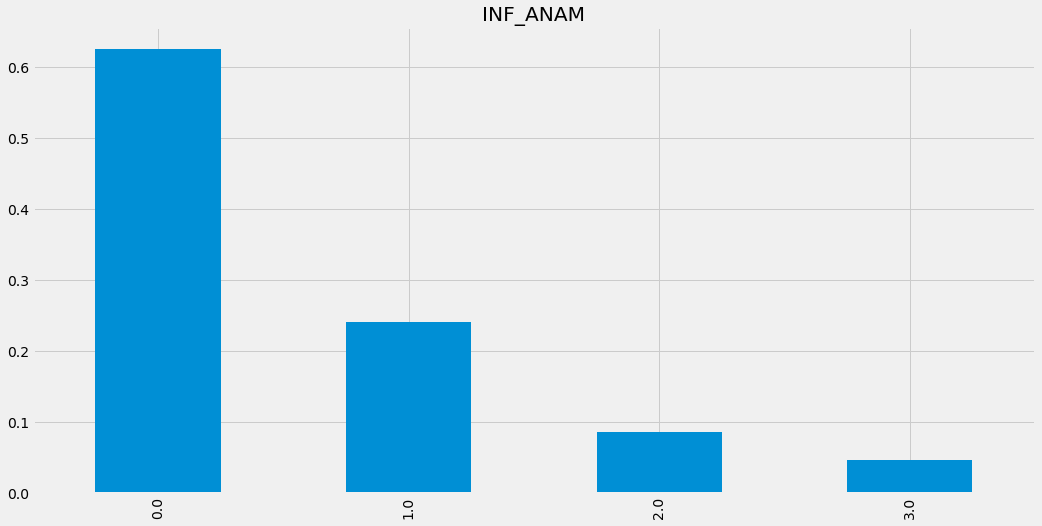

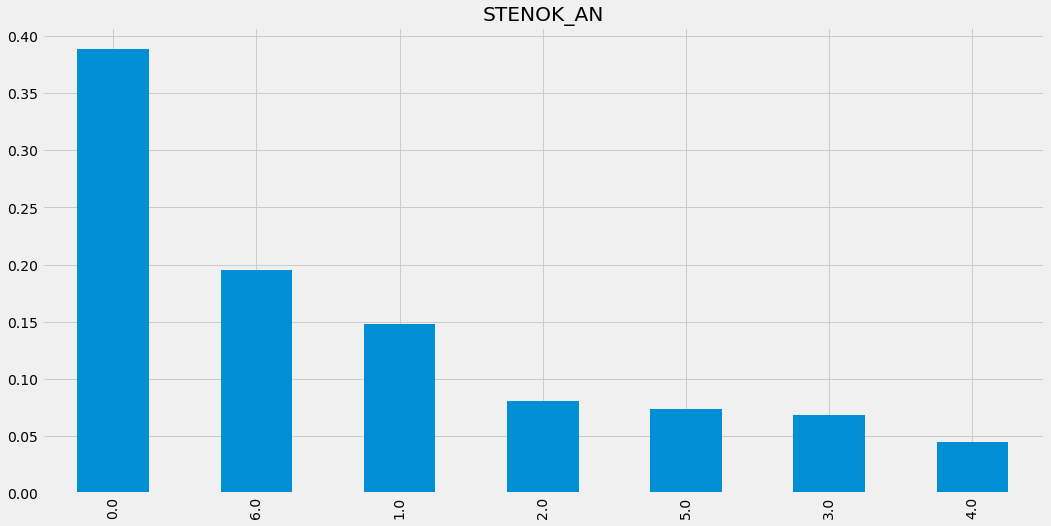

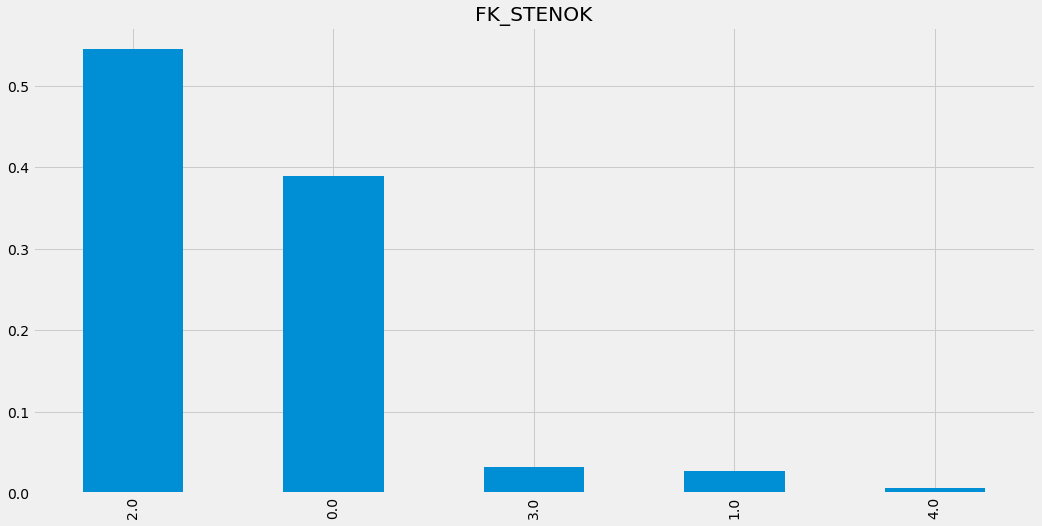

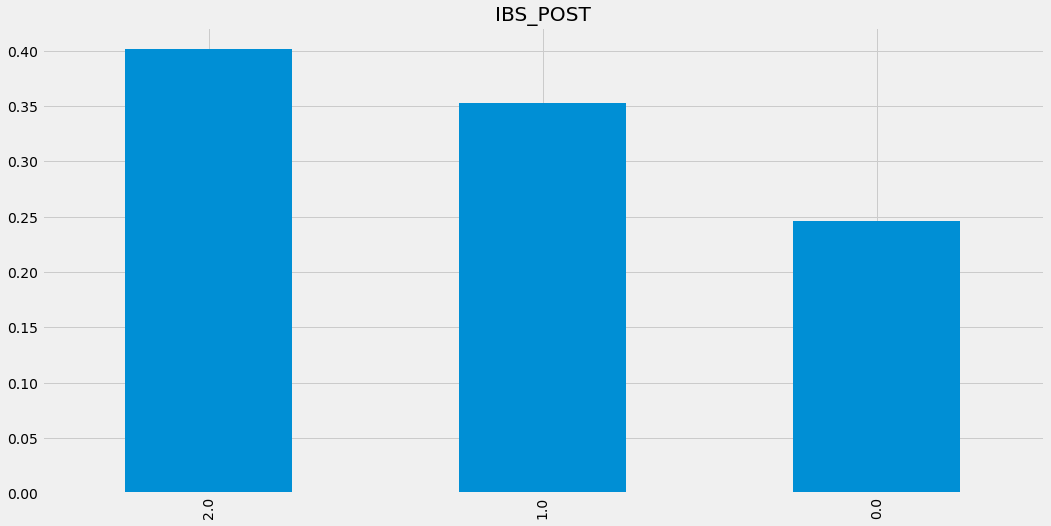

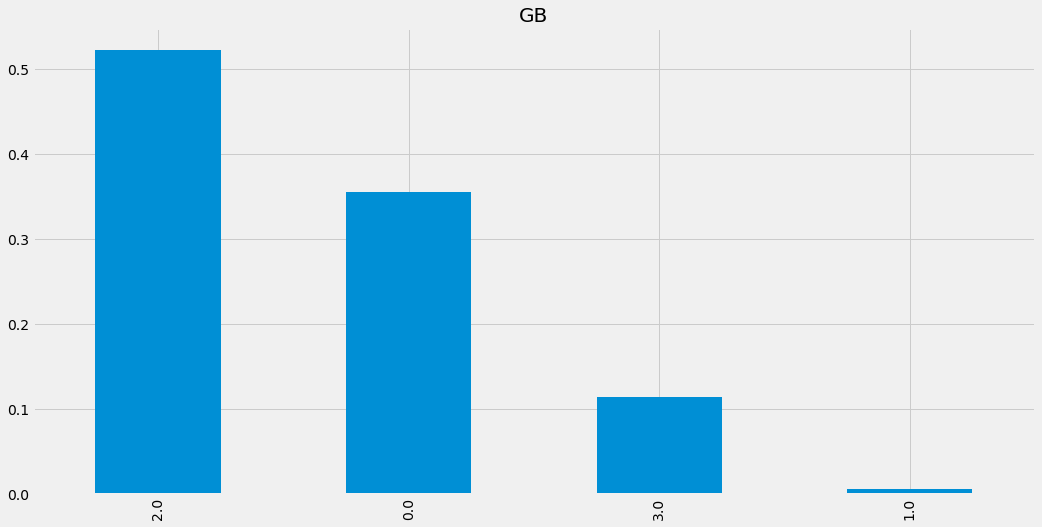

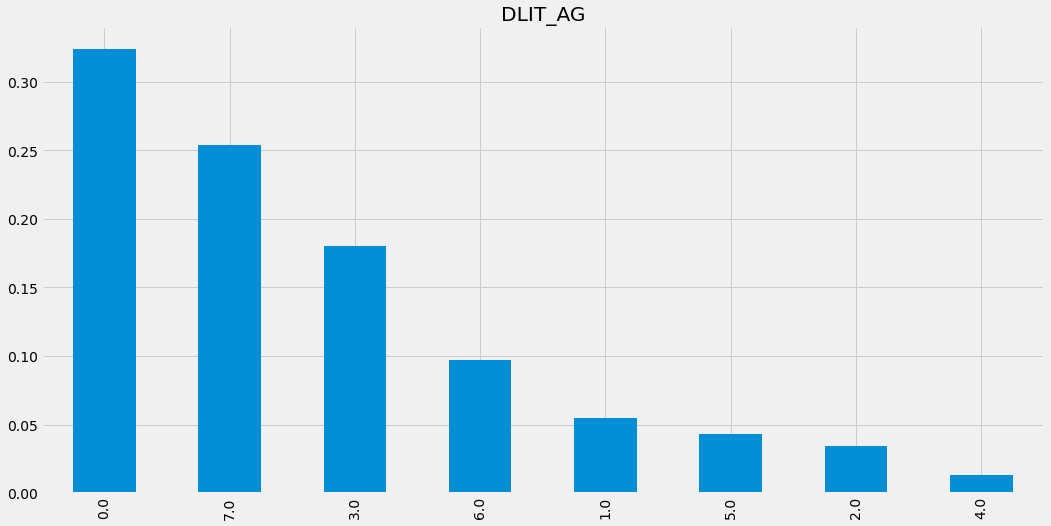

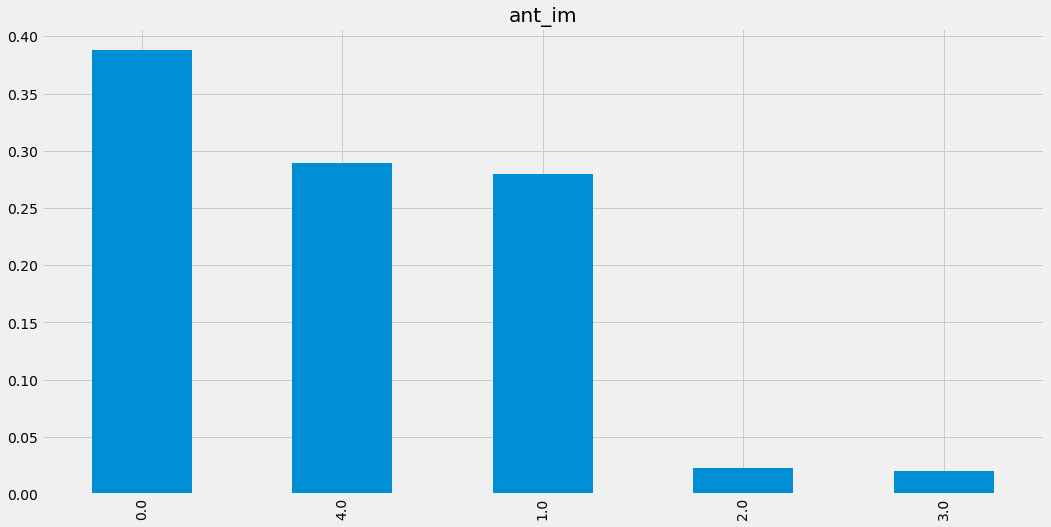

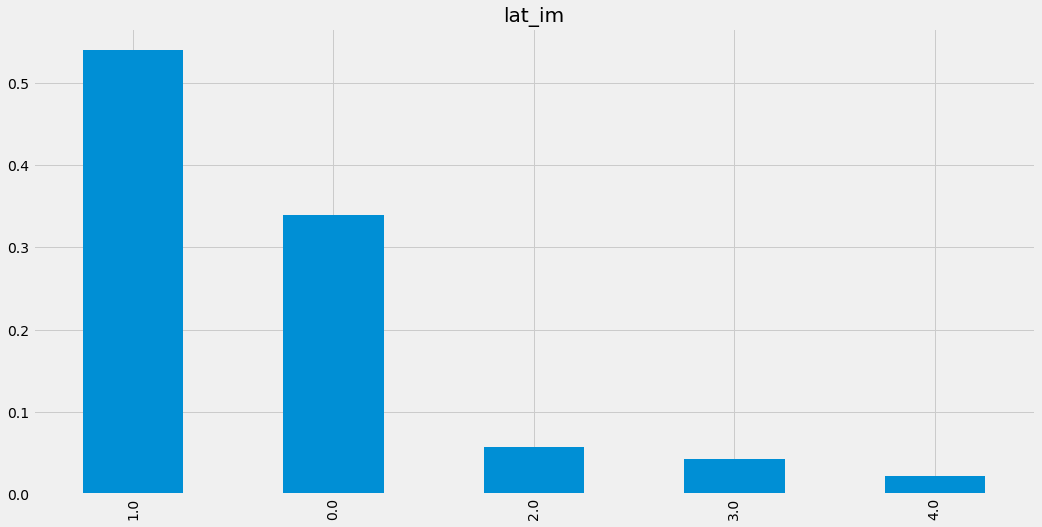

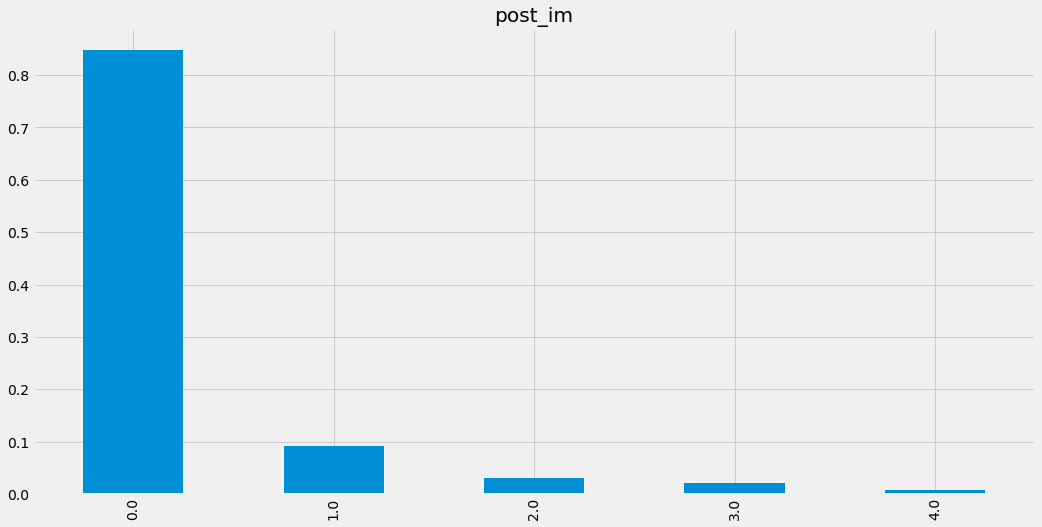

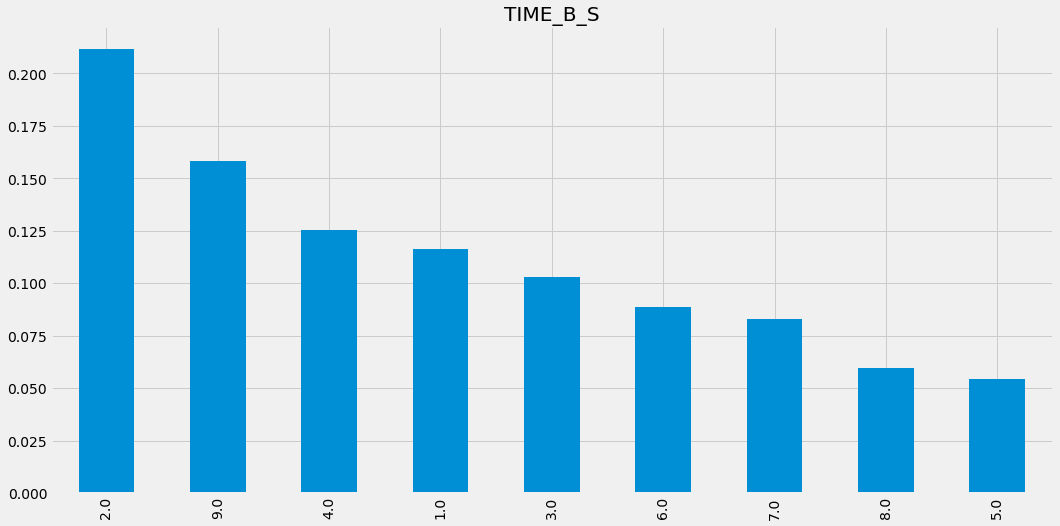

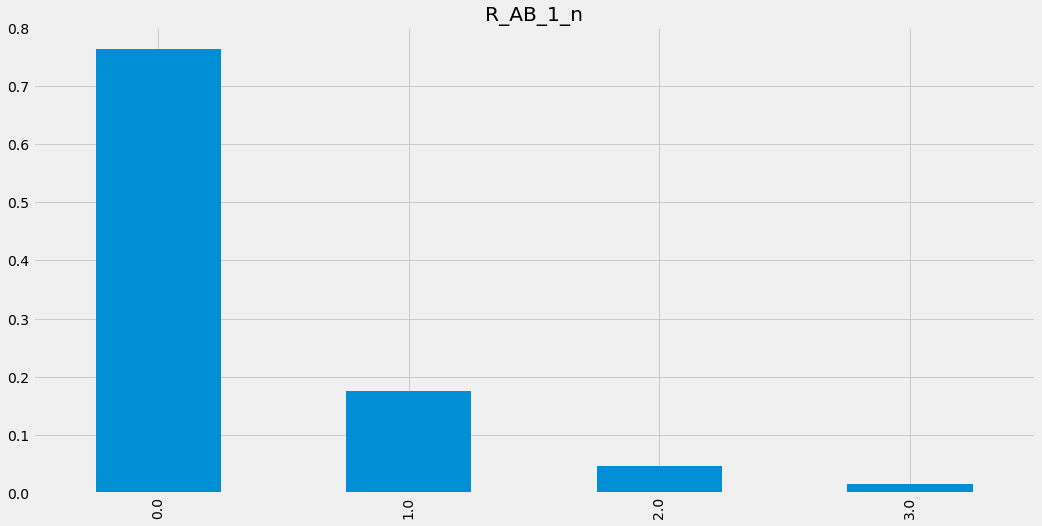

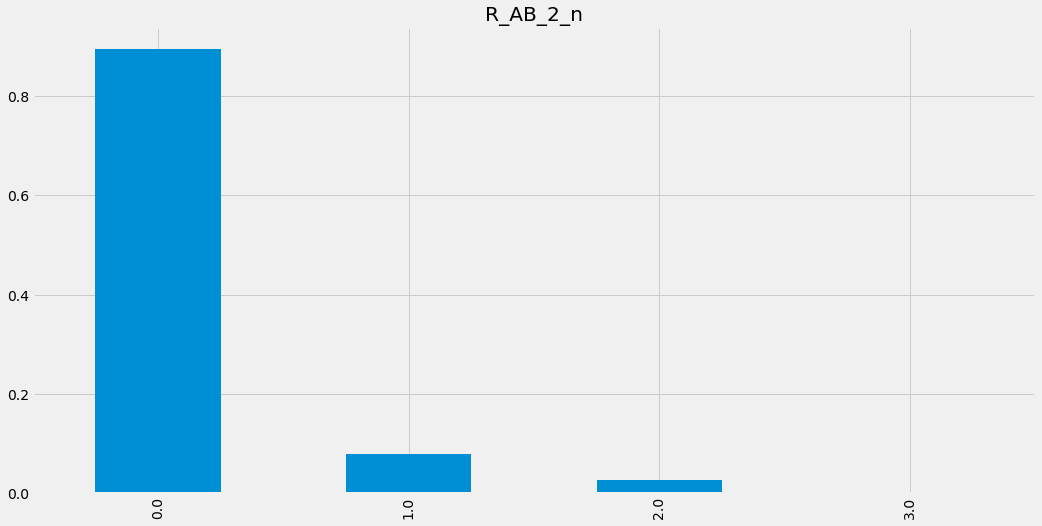

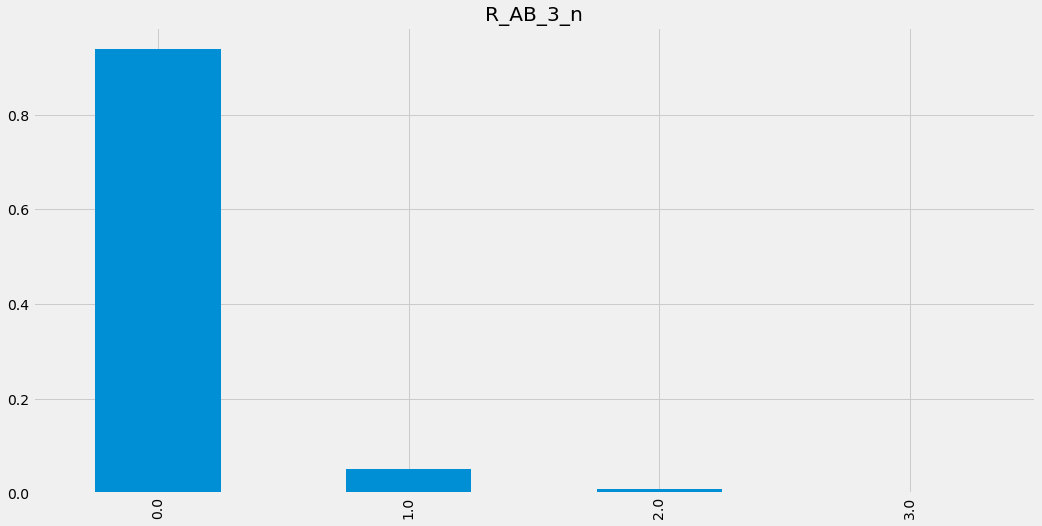

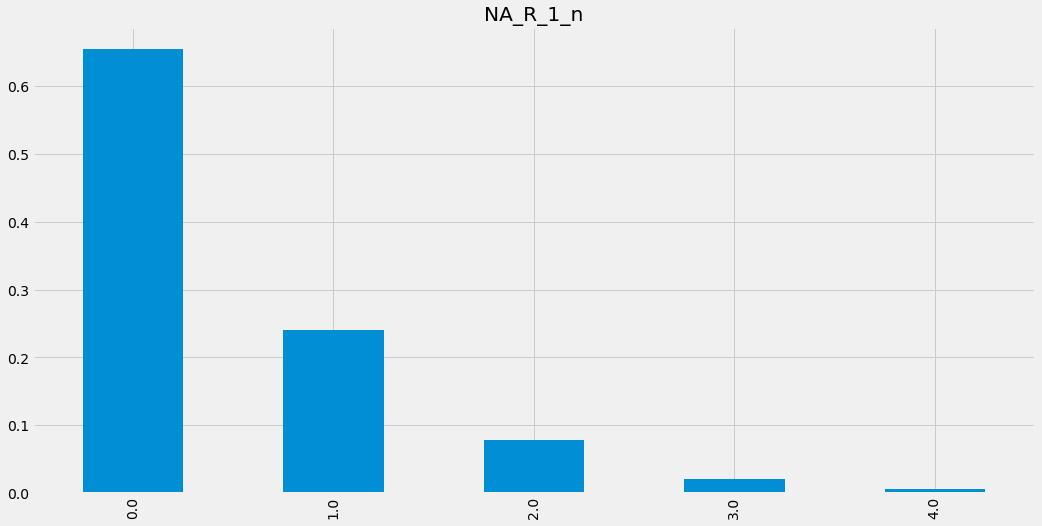

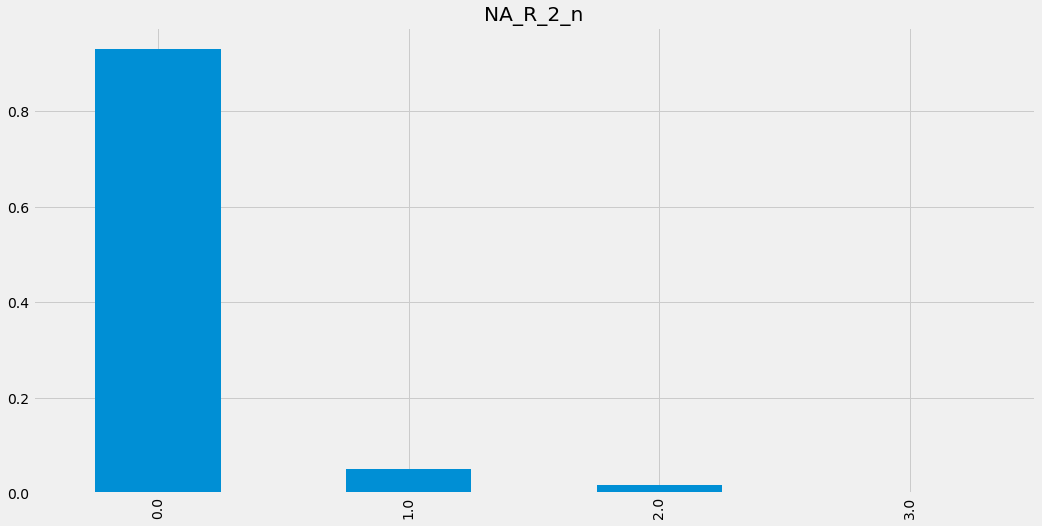

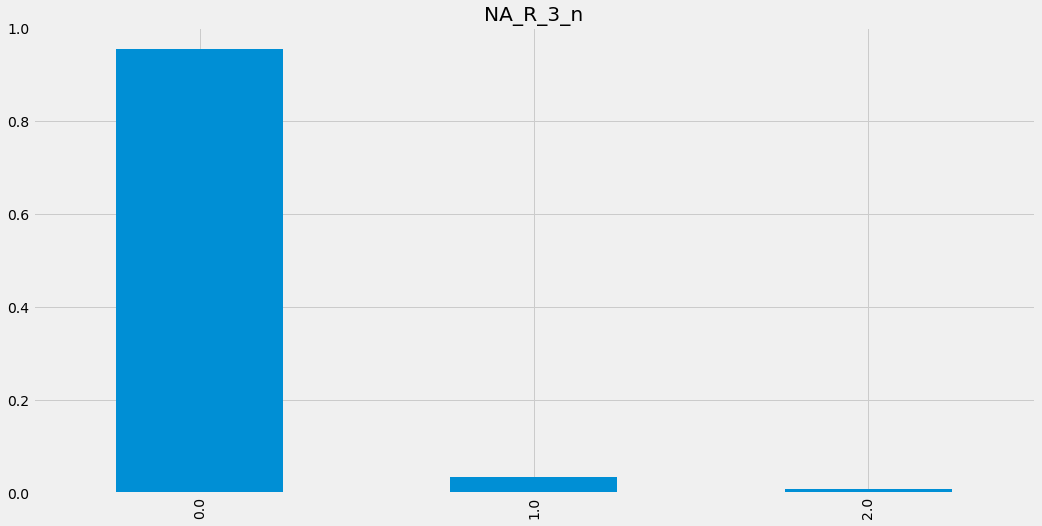

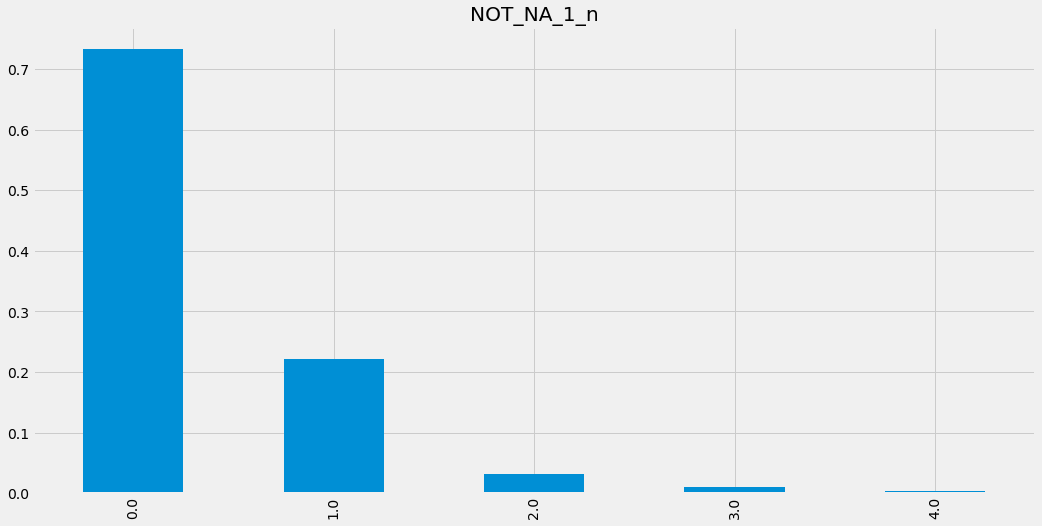

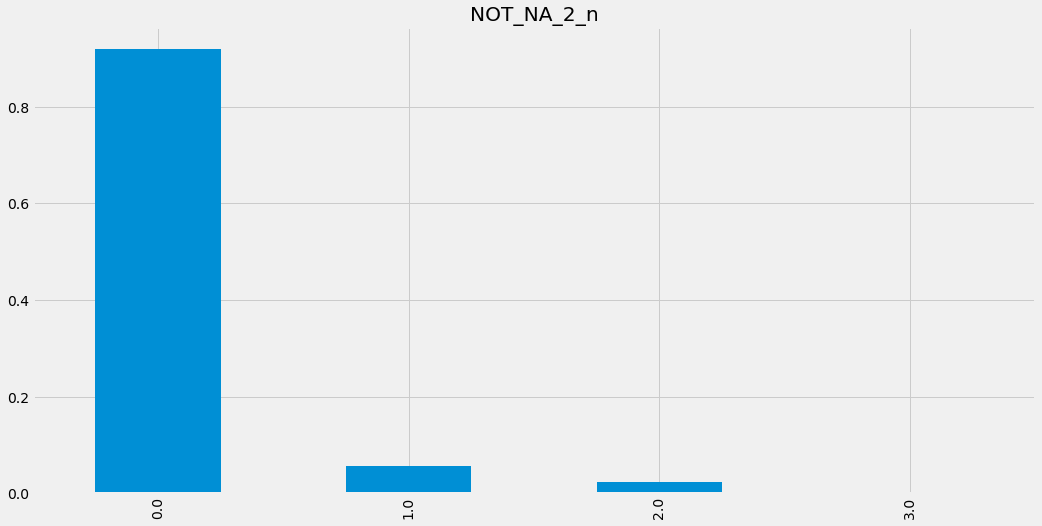

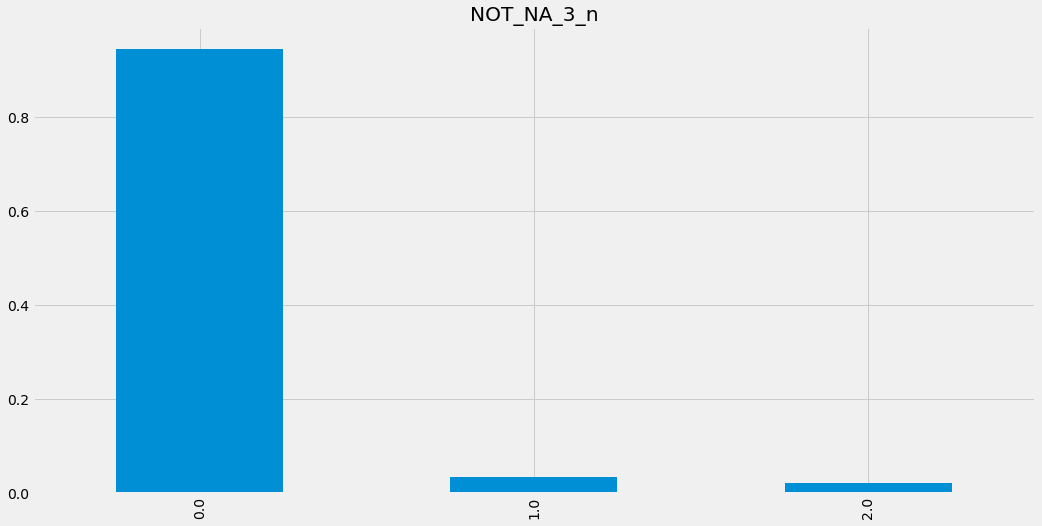

In [14]:
df_imputed['INF_ANAM'].value_counts(normalize=True).plot.bar(title='INF_ANAM')
plt.show()
df_imputed['STENOK_AN'].value_counts(normalize=True).plot.bar(title='STENOK_AN')
plt.show()
df_imputed['FK_STENOK'].value_counts(normalize=True).plot.bar(title='FK_STENOK')
plt.show()
df_imputed['IBS_POST'].value_counts(normalize=True).plot.bar(title='IBS_POST')
plt.show()
df_imputed['GB'].value_counts(normalize=True).plot.bar(title='GB')
plt.show()
df_imputed['DLIT_AG'].value_counts(normalize=True).plot.bar(title='DLIT_AG')
plt.show()
df_imputed['ant_im'].value_counts(normalize=True).plot.bar(title='ant_im')
plt.show()
df_imputed['lat_im'].value_counts(normalize=True).plot.bar(title='lat_im')
plt.show()
df_imputed['post_im'].value_counts(normalize=True).plot.bar(title='post_im')
plt.show()
df_imputed['TIME_B_S'].value_counts(normalize=True).plot.bar(title='TIME_B_S')
plt.show()
df_imputed['R_AB_1_n'].value_counts(normalize=True).plot.bar(title='R_AB_1_n')
plt.show()
df_imputed['R_AB_2_n'].value_counts(normalize=True).plot.bar(title='R_AB_2_n')
plt.show()
df_imputed['R_AB_3_n'].value_counts(normalize=True).plot.bar(title='R_AB_3_n')
plt.show()
df_imputed['NA_R_1_n'].value_counts(normalize=True).plot.bar(title='NA_R_1_n')
plt.show()
df_imputed['NA_R_2_n'].value_counts(normalize=True).plot.bar(title='NA_R_2_n')
plt.show()
df_imputed['NA_R_3_n'].value_counts(normalize=True).plot.bar(title='NA_R_3_n')
plt.show()
df_imputed['NOT_NA_1_n'].value_counts(normalize=True).plot.bar(title='NOT_NA_1_n')
plt.show()
df_imputed['NOT_NA_2_n'].value_counts(normalize=True).plot.bar(title='NOT_NA_2_n')
plt.show()
df_imputed['NOT_NA_3_n'].value_counts(normalize=True).plot.bar(title='NOT_NA_3_n')
plt.show()

# Independent Variable : Numerical

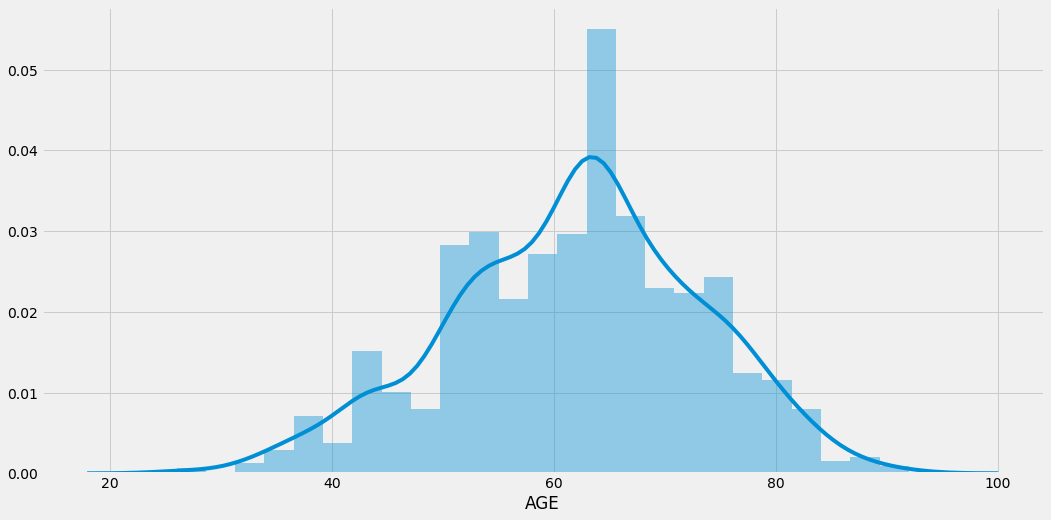

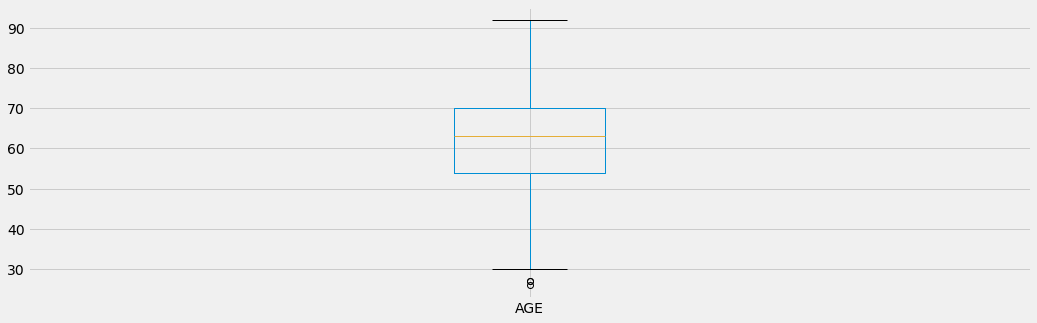

In [15]:
sns.distplot(df_imputed['AGE'])
plt.show()
df_imputed['AGE'].plot.box(figsize=(16,5))
plt.show()

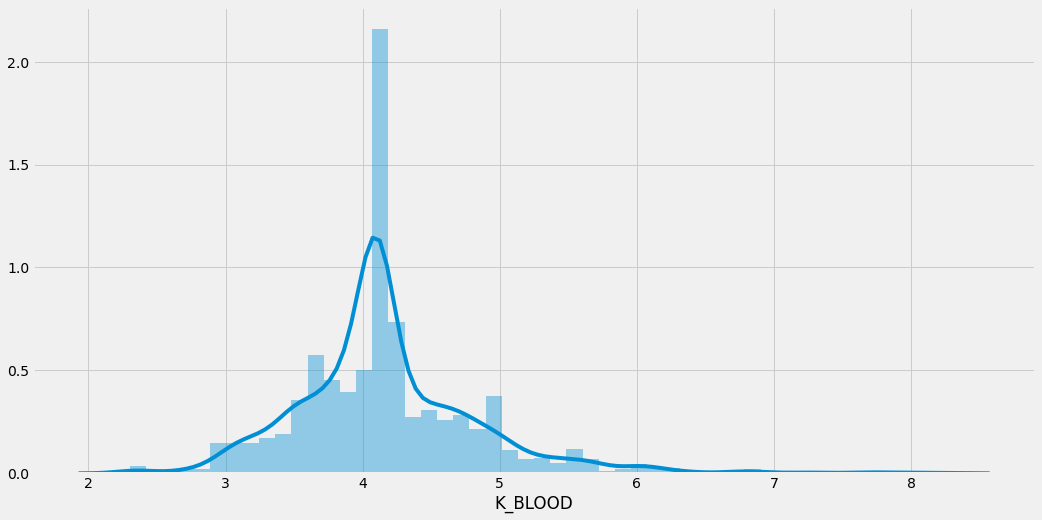

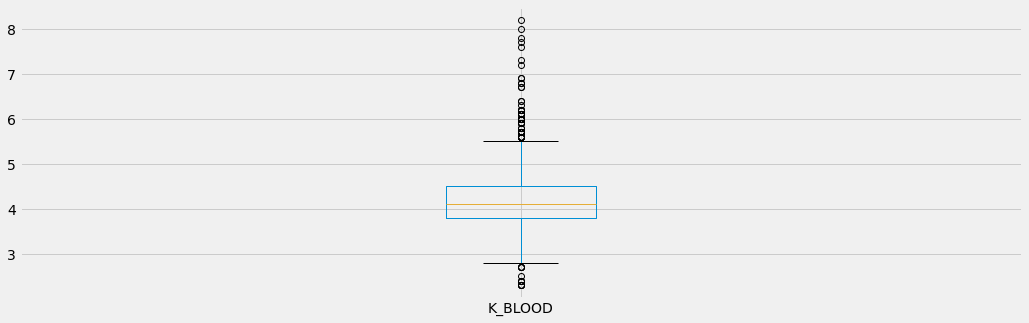

In [16]:
sns.distplot(df_imputed['K_BLOOD'])
plt.show()
df_imputed['K_BLOOD'].plot.box(figsize=(16,5))
plt.show()

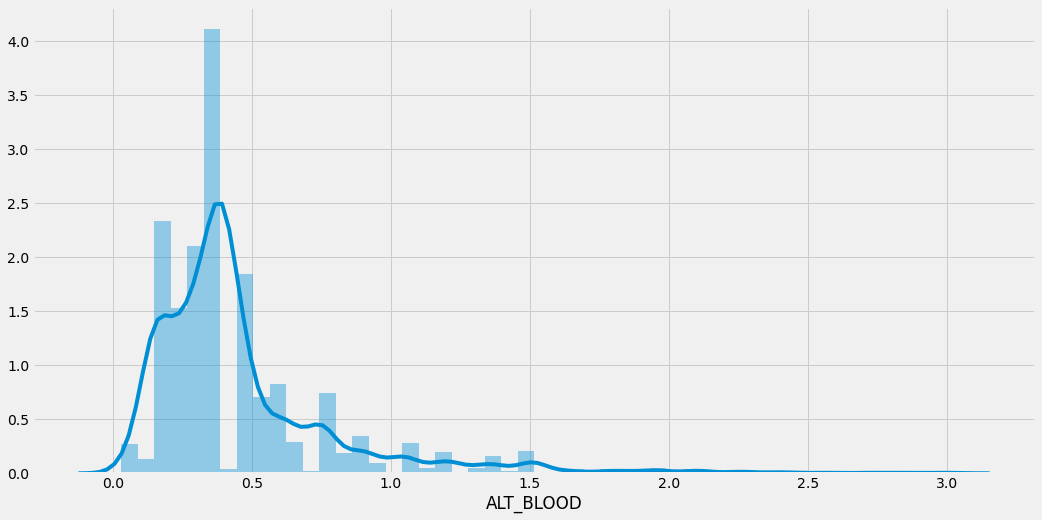

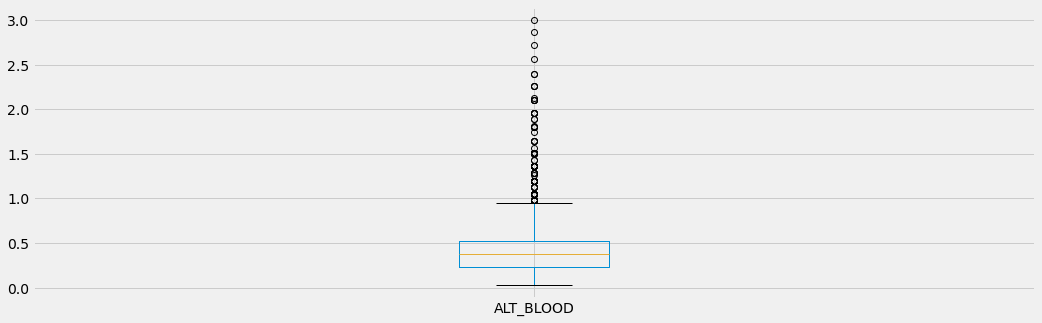

In [17]:
sns.distplot(df_imputed['ALT_BLOOD'])
plt.show()
df_imputed['ALT_BLOOD'].plot.box(figsize=(16,5))
plt.show()

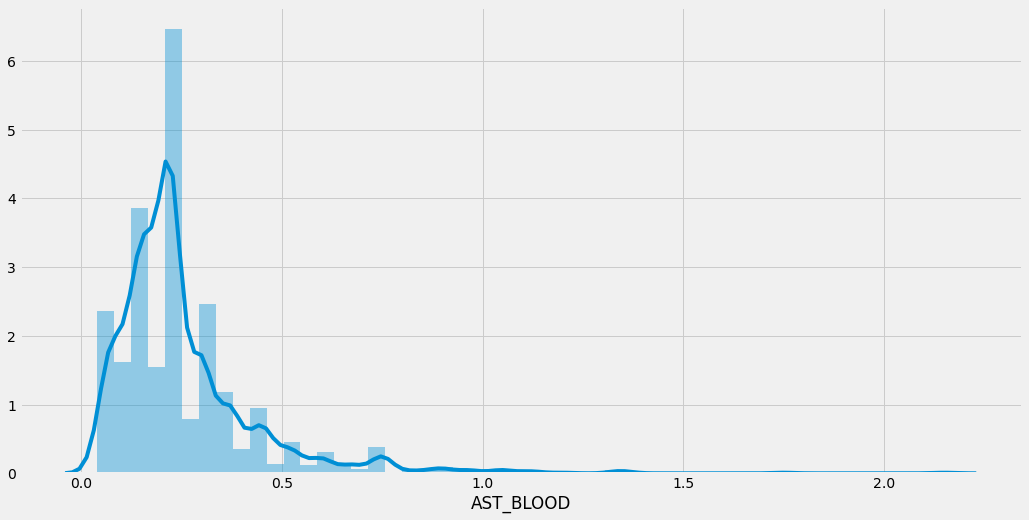

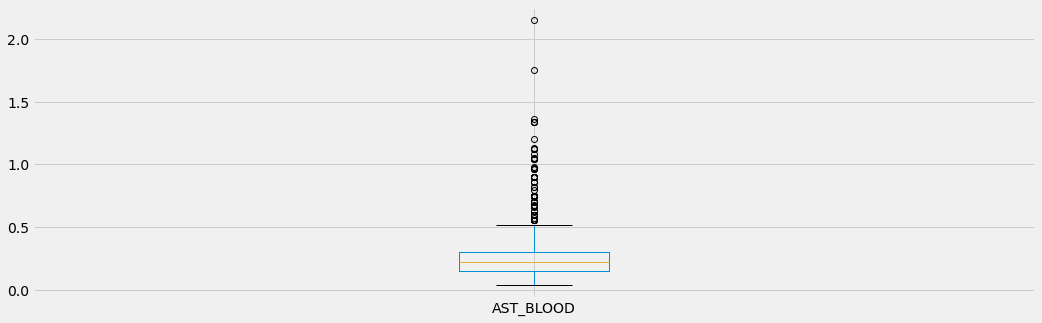

In [18]:
sns.distplot(df_imputed['AST_BLOOD'])
plt.show()
df_imputed['AST_BLOOD'].plot.box(figsize=(16,5))
plt.show()

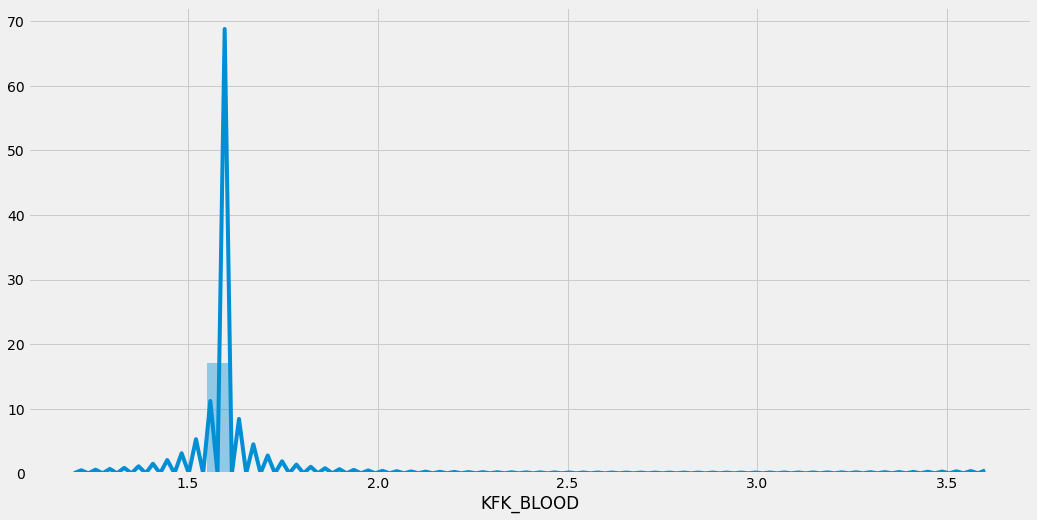

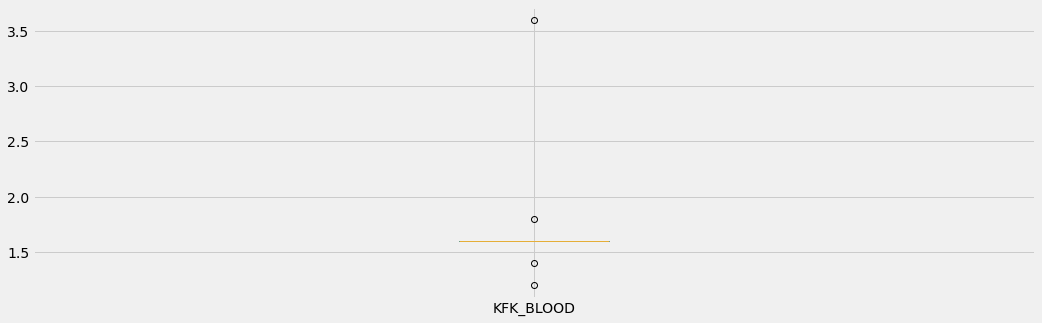

In [19]:
sns.distplot(df_imputed['KFK_BLOOD'])
plt.show()
df_imputed['KFK_BLOOD'].plot.box(figsize=(16,5))
plt.show()

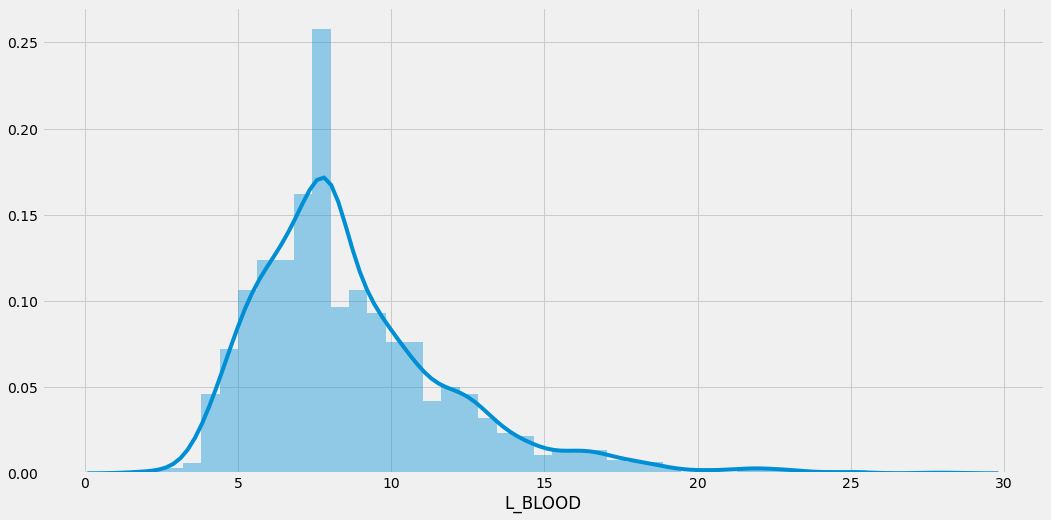

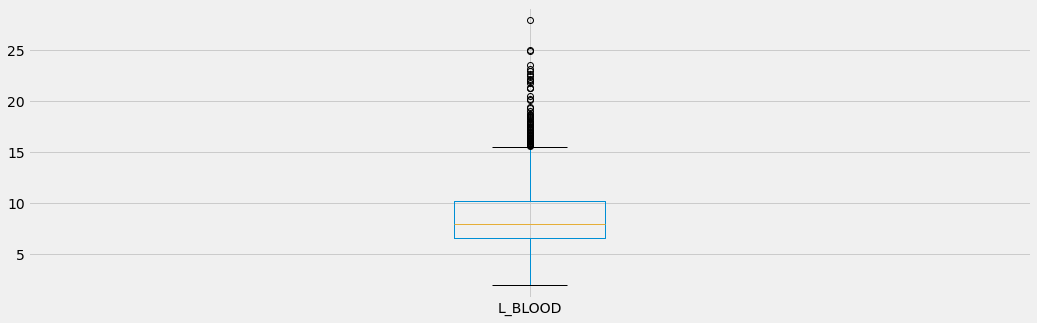

In [20]:
sns.distplot(df_imputed['L_BLOOD'])
plt.show()
df_imputed['L_BLOOD'].plot.box(figsize=(16,5))
plt.show()

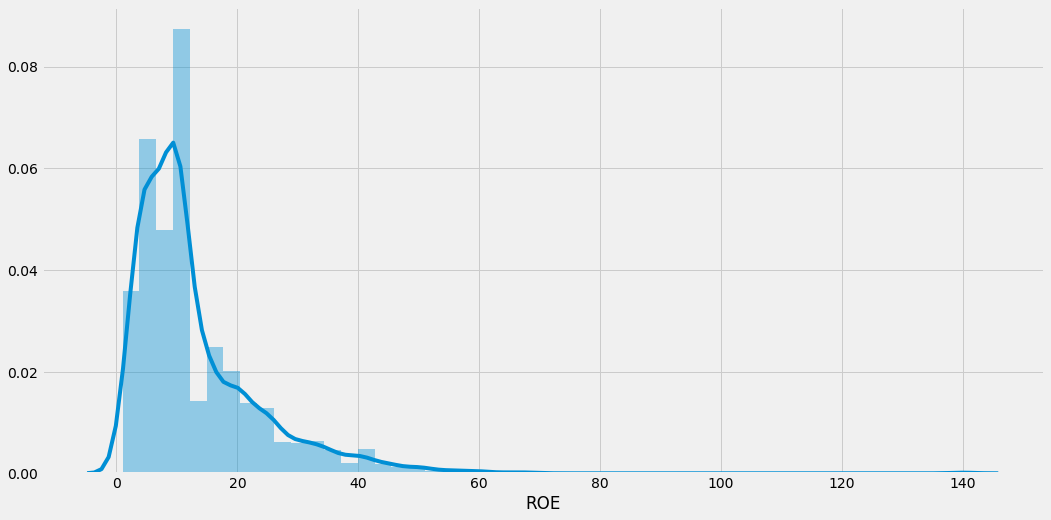

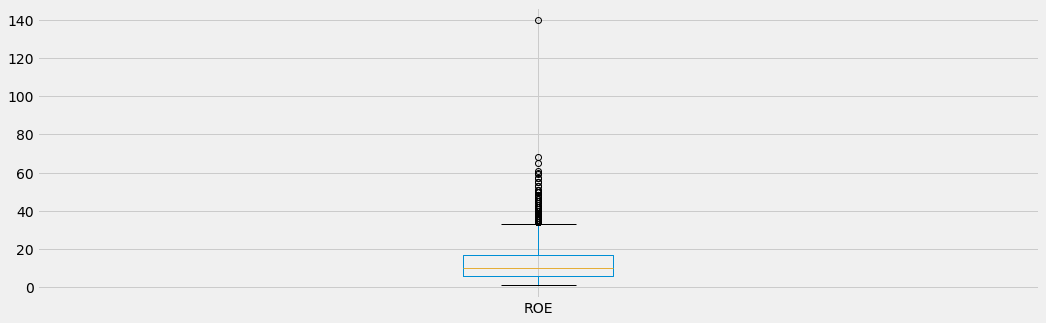

In [21]:
sns.distplot(df_imputed['ROE'])
plt.show()
df_imputed['ROE'].plot.box(figsize=(16,5))
plt.show()

# Bivariate Analysis

# Categorical Independent Variable vs Target Variable

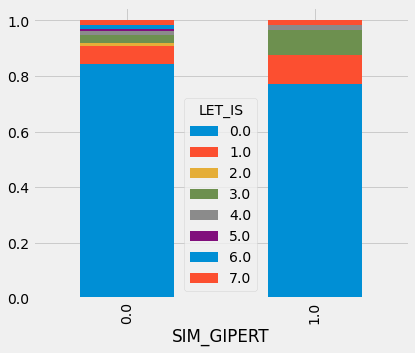

In [22]:
SIM_GIPERT=pd.crosstab(df_imputed['SIM_GIPERT'],df_imputed['LET_IS'])
SIM_GIPERT.div(SIM_GIPERT.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

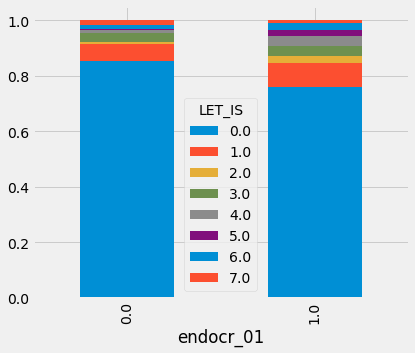

In [23]:
endocr_01=pd.crosstab(df_imputed['endocr_01'],df_imputed['LET_IS'])
endocr_01.div(endocr_01.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

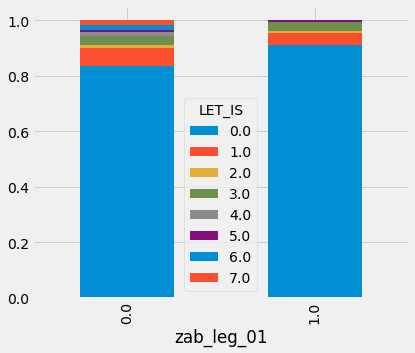

In [24]:
zab_leg_01=pd.crosstab(df_imputed['zab_leg_01'],df_imputed['LET_IS'])
zab_leg_01.div(zab_leg_01.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

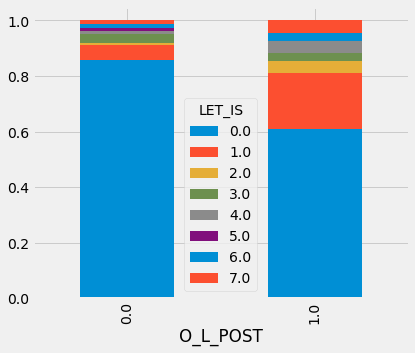

In [25]:
O_L_POST=pd.crosstab(df_imputed['O_L_POST'],df_imputed['LET_IS'])
O_L_POST.div(O_L_POST.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

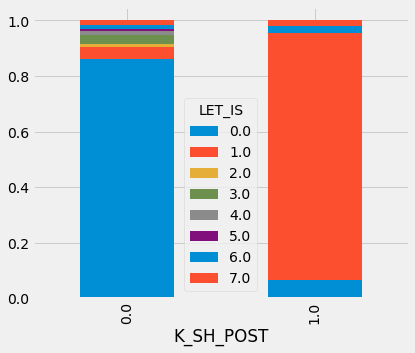

In [26]:
K_SH_POST=pd.crosstab(df_imputed['K_SH_POST'],df_imputed['LET_IS'])
K_SH_POST.div(K_SH_POST.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

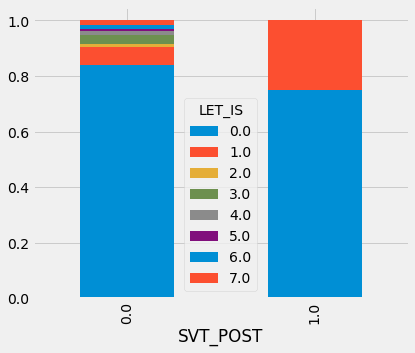

In [27]:
SVT_POST=pd.crosstab(df_imputed['SVT_POST'],df_imputed['LET_IS'])
SVT_POST.div(SVT_POST.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

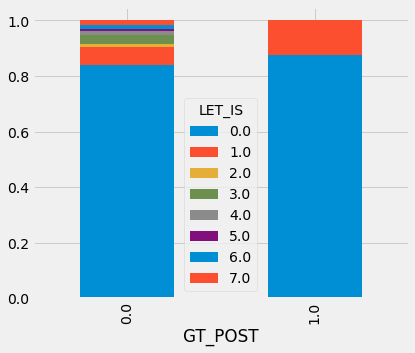

In [28]:
GT_POST=pd.crosstab(df_imputed['GT_POST'],df_imputed['LET_IS'])
GT_POST.div(GT_POST.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

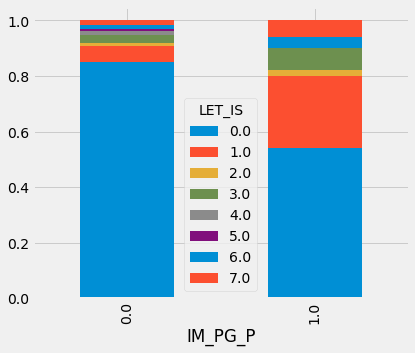

In [29]:
IM_PG_P=pd.crosstab(df_imputed['IM_PG_P'],df_imputed['LET_IS'])
IM_PG_P.div(IM_PG_P.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

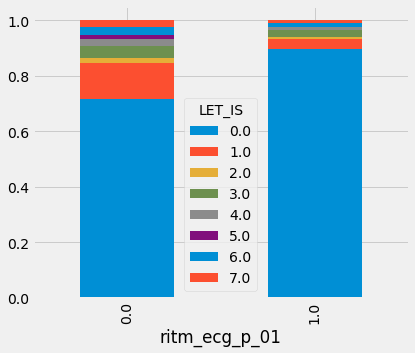

In [30]:
ritm_ecg_p_01=pd.crosstab(df_imputed['ritm_ecg_p_01'],df_imputed['LET_IS'])
ritm_ecg_p_01.div(ritm_ecg_p_01.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

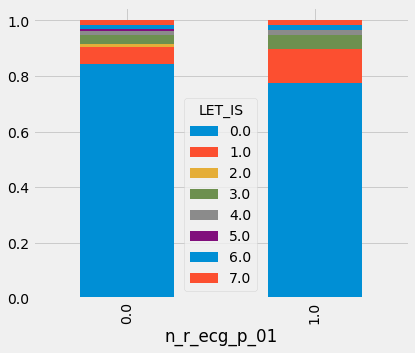

In [31]:
n_r_ecg_p_01=pd.crosstab(df_imputed['n_r_ecg_p_01'],df_imputed['LET_IS'])
n_r_ecg_p_01.div(n_r_ecg_p_01.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

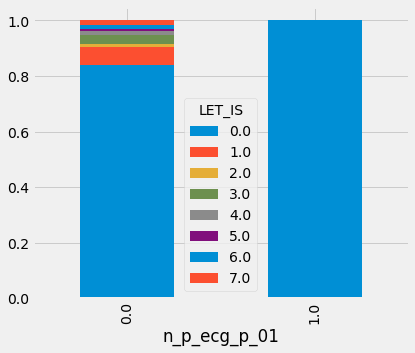

In [32]:
n_p_ecg_p_01=pd.crosstab(df_imputed['n_p_ecg_p_01'],df_imputed['LET_IS'])
n_p_ecg_p_01.div(n_p_ecg_p_01.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

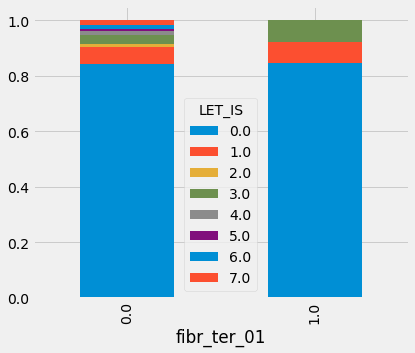

In [33]:
fibr_ter_01=pd.crosstab(df_imputed['fibr_ter_01'],df_imputed['LET_IS'])
fibr_ter_01.div(fibr_ter_01.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

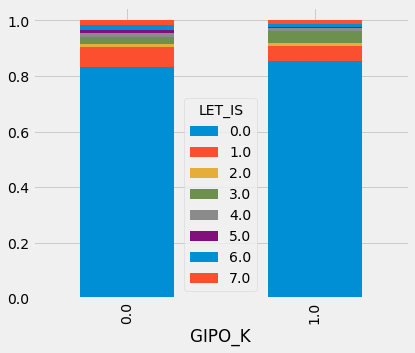

In [34]:
GIPO_K=pd.crosstab(df_imputed['GIPO_K'],df_imputed['LET_IS'])
GIPO_K.div(GIPO_K.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

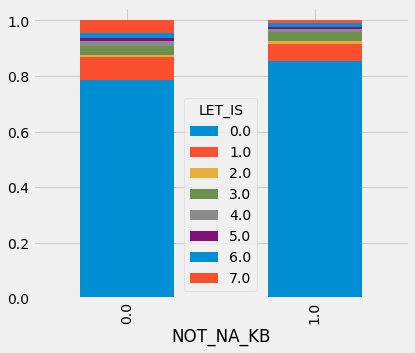

In [35]:
NOT_NA_KB=pd.crosstab(df_imputed['NOT_NA_KB'],df_imputed['LET_IS'])
NOT_NA_KB.div(NOT_NA_KB.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

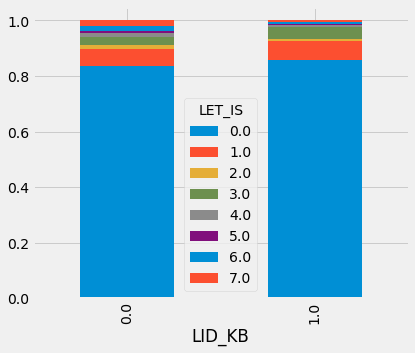

In [36]:
LID_KB=pd.crosstab(df_imputed['LID_KB'],df_imputed['LET_IS'])
LID_KB.div(LID_KB.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

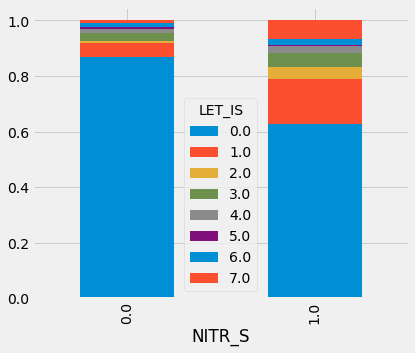

In [37]:
NITR_S=pd.crosstab(df_imputed['NITR_S'],df_imputed['LET_IS'])
NITR_S.div(NITR_S.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

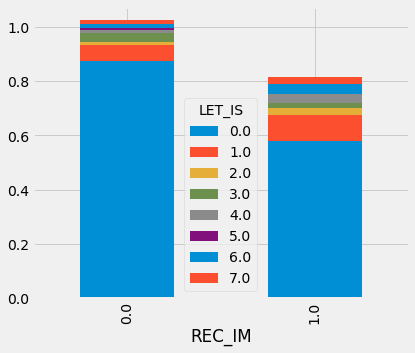

In [38]:
REC_IM=pd.crosstab(df_imputed['REC_IM'],df_imputed['LET_IS'])
REC_IM.div(NITR_S.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,5))
plt.show()

In [39]:
# Considering only numerical data 
md_data = df_imputed.iloc[:,:122]
md_data.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN
0,77.0,1.0,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,60.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Converting into numpy array
Myocardial= md_data.values
Myocardial

array([[77.,  1.,  2., ...,  0.,  0.,  0.],
       [55.,  1.,  1., ...,  0.,  0.,  0.],
       [52.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [55.,  1.,  3., ...,  0.,  1.,  0.],
       [79.,  0.,  2., ...,  0.,  0.,  0.],
       [63.,  1.,  2., ...,  0.,  0.,  0.]])

In [41]:
from sklearn.preprocessing import scale
# Normalizing the numerical data 
Myocardial_normal = scale(Myocardial)

In [42]:
X=Myocardial_normal
X

array([[ 1.34792144,  0.77216846,  1.73022388, ..., -0.54925817,
        -0.32121605, -0.30880548],
       [-0.61105353,  0.77216846,  0.53405446, ..., -0.54925817,
        -0.32121605, -0.30880548],
       [-0.87818648,  0.77216846, -0.66211495, ..., -0.54925817,
        -0.32121605, -0.30880548],
       ...,
       [-0.61105353,  0.77216846,  2.9263933 , ..., -0.54925817,
         3.11316943, -0.30880548],
       [ 1.52601007, -1.29505419,  1.73022388, ..., -0.54925817,
        -0.32121605, -0.30880548],
       [ 0.101301  ,  0.77216846,  1.73022388, ..., -0.54925817,
        -0.32121605, -0.30880548]])

In [43]:
array_y=df_imputed['LET_IS'].values
Y=array_y
Y

array([0., 0., 0., ..., 6., 1., 1.])

In [44]:
# Feature Importance with Decision Trees Classifier
from sklearn.tree import  DecisionTreeClassifier
# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[3.83136863e-02 2.04698924e-03 5.11747310e-03 6.34034979e-03
 4.47628559e-03 1.83944259e-02 0.00000000e+00 7.08268943e-03
 1.51718805e-04 2.72931899e-03 1.68756552e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.37087121e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.62099991e-03 0.00000000e+00
 0.00000000e+00 3.27518278e-03 8.98622810e-04 3.84223182e-03
 0.00000000e+00 5.43537875e-03 7.14283221e-03 0.00000000e+00
 0.00000000e+00 2.17626824e-02 2.16354377e-02 2.00254136e-02
 3.48318010e-02 2.82822550e-03 1.28342272e-01 2.04698924e-03
 3.99412535e-03 0.00000000e+00 0.00000000e+00 1.08839425e-02
 9.45010795e-03 3.52621559e-03 6.31545512e-03 2.64805494e-03
 7.17846828e-03 7.74340879e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.59155935e-03 0.00000000e+00
 7.29118072e-03 1.29652573e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.25519744e-04 0.000000

In [45]:
len(model.feature_importances_)

122

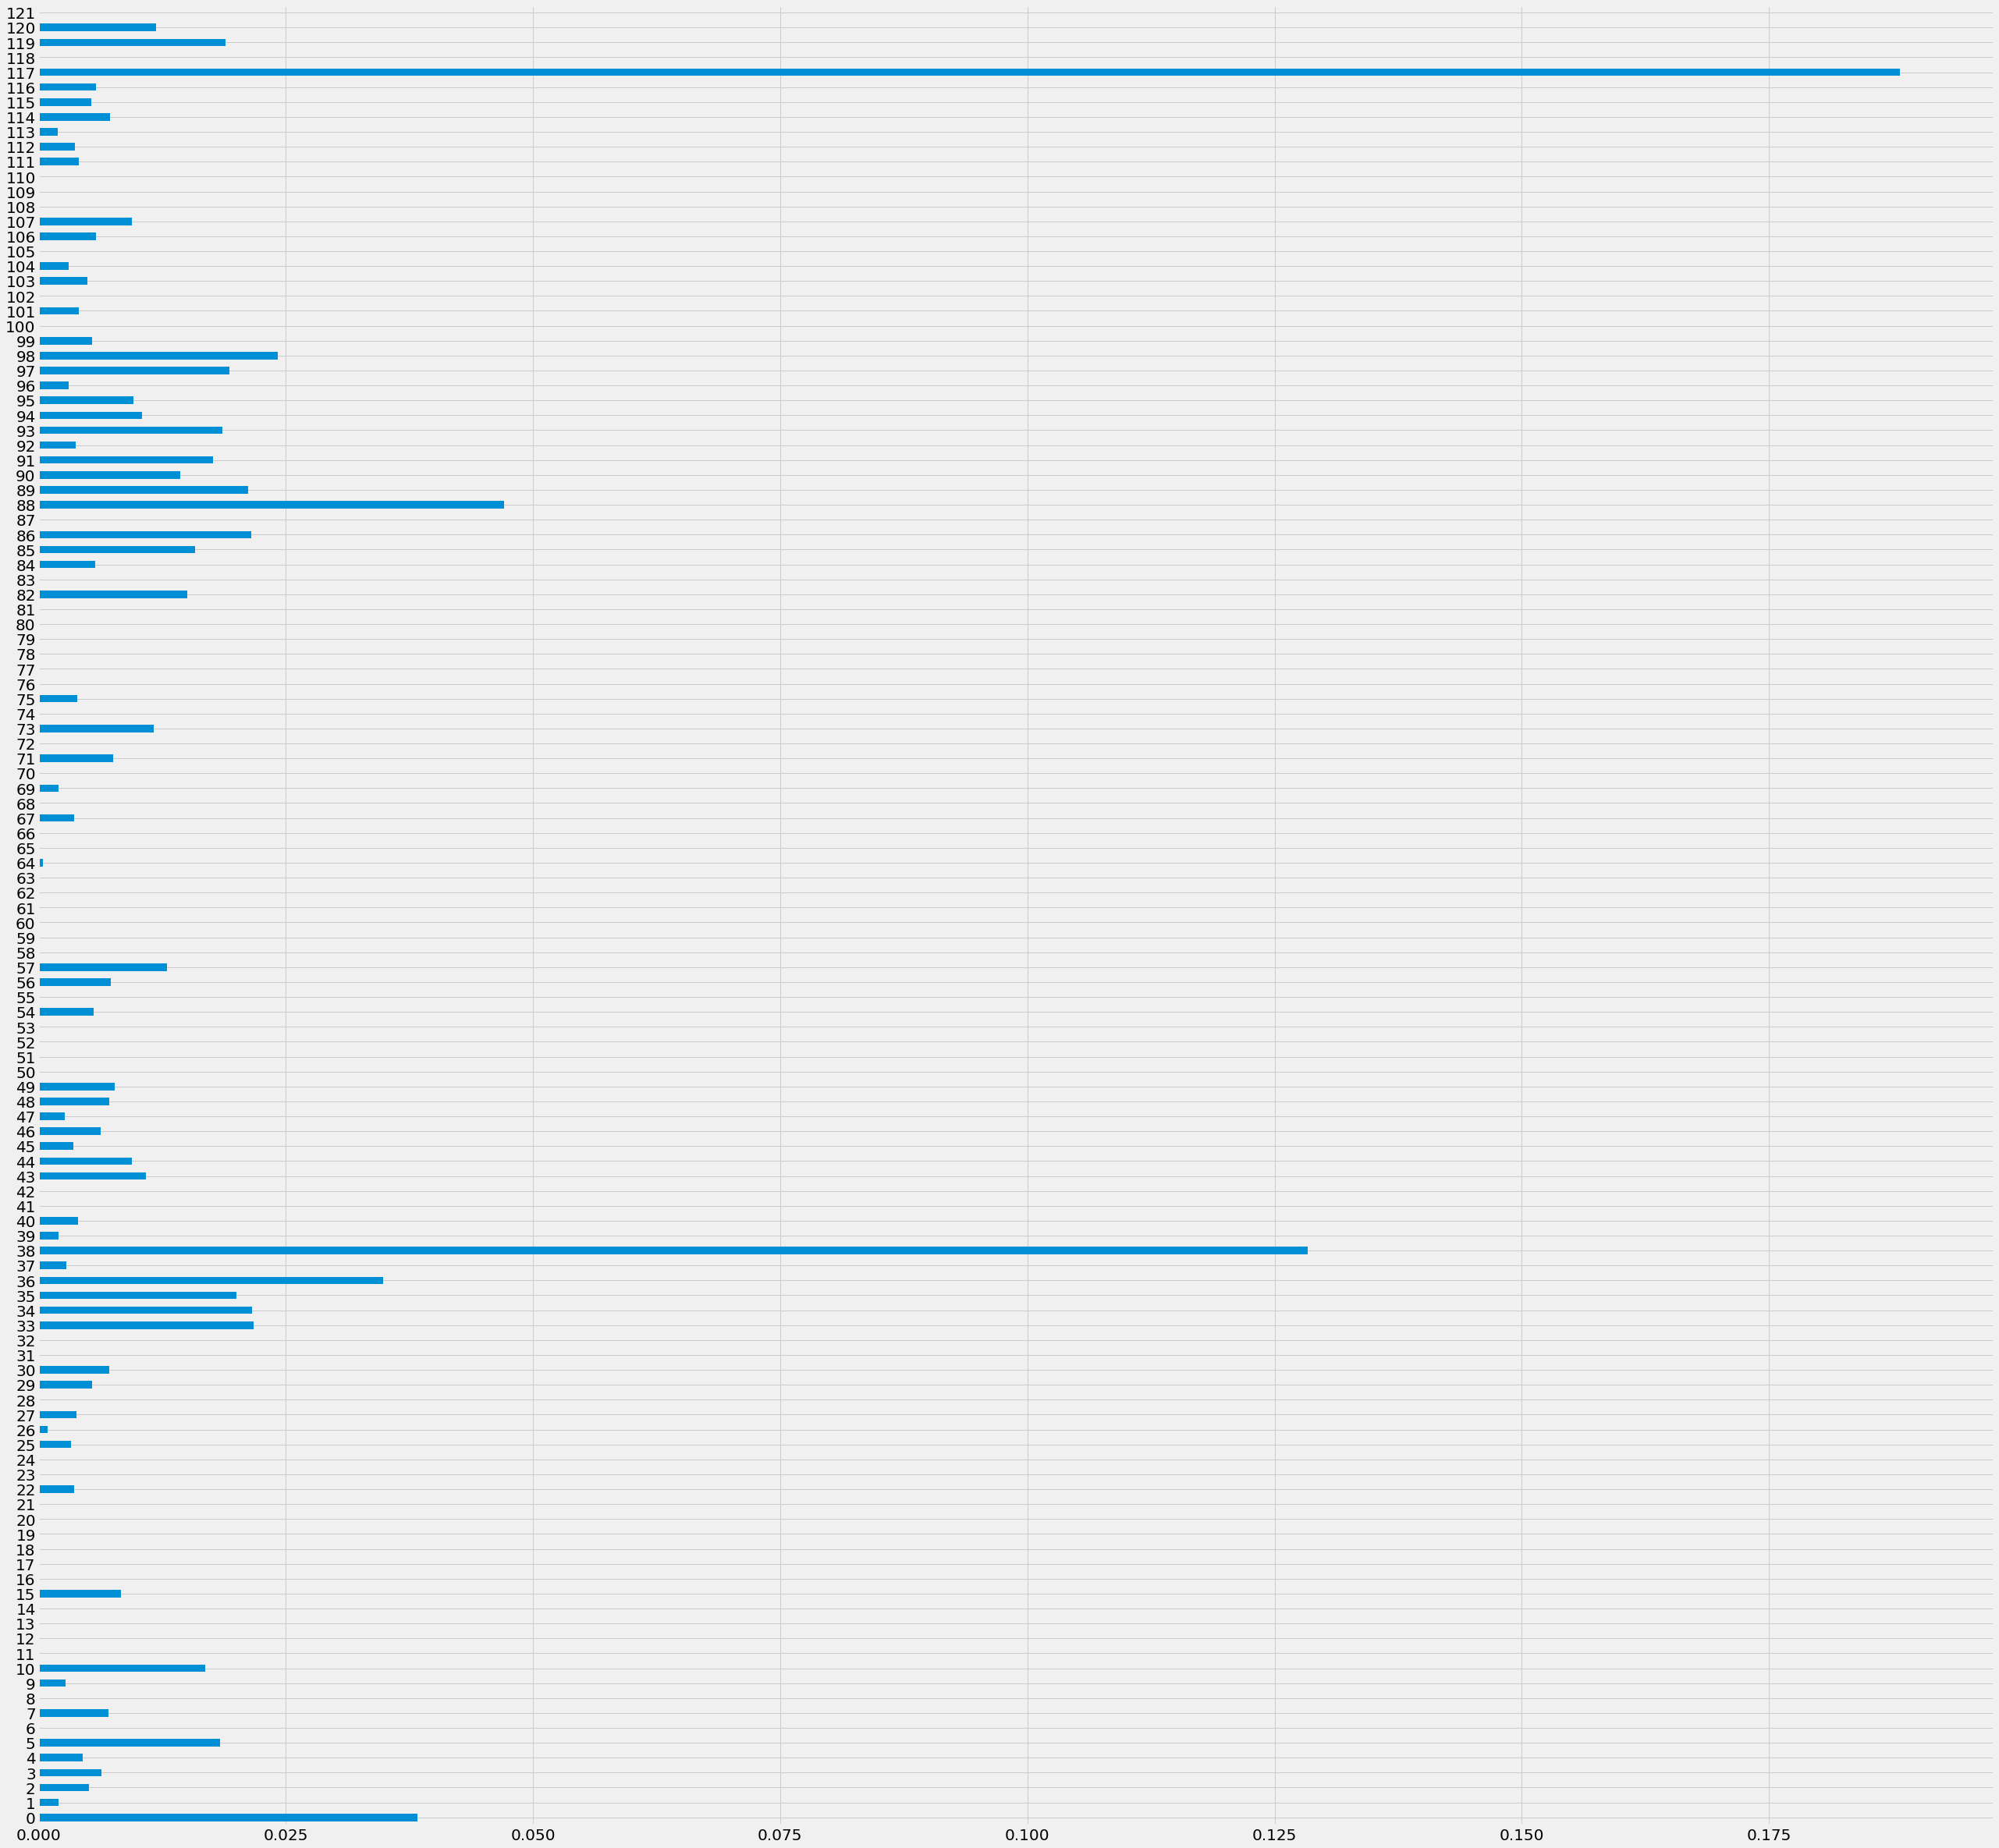

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize= (40 , 40))
ranked_features_dtc =pd.Series(model.feature_importances_ )
ranked_features_dtc.plot(kind='barh' , fontsize = 20)
plt.show()

In [47]:
DTreeclassifier_data = pd.DataFrame(model.feature_importances_ , columns=["Score"])
dfcolumns_dtc=pd.DataFrame(md_data.columns)
dtc_features_rank=pd.concat([dfcolumns_dtc,DTreeclassifier_data],axis=1)
dtc_features_rank.columns=['DTC Features','Score']
dtc_features_rank

,DTC Features,Score
0,AGE,0.038314
1,SEX,0.002047
2,INF_ANAM,0.005117
3,STENOK_AN,0.006340
4,FK_STENOK,0.004476
...,...,...
117,RAZRIV,0.188268
118,DRESSLER,0.000000
119,ZSN,0.018941
120,REC_IM,0.011888


In [48]:
dtc_features_rank.mean()

Score    0.008197
dtype: float64

In [49]:
dtc_features_rank['DTC Features'][dtc_features_rank['Score'] > 0.008197]

0               AGE
5          IBS_POST
10            ZSN_A
15            nr_04
33       S_AD_KBRIG
34       D_AD_KBRIG
35        S_AD_ORIT
36        D_AD_ORIT
38        K_SH_POST
43           ant_im
44           lat_im
57     n_r_ecg_p_04
73     n_p_ecg_p_12
82          K_BLOOD
85        ALT_BLOOD
86        AST_BLOOD
88          L_BLOOD
89              ROE
90         TIME_B_S
91         R_AB_1_n
93         R_AB_3_n
94            NA_KB
95        NOT_NA_KB
97           NITR_S
98         NA_R_1_n
107       GEPAR_S_n
117          RAZRIV
119             ZSN
120          REC_IM
Name: DTC Features, dtype: object

In [67]:
#These are the features getting by Decision Tree Classifier

In [23]:
DC_Data = df_imputed[['AGE' ,'STENOK_AN' , 'FK_STENOK' ,'IBS_POST' ,'ZSN_A', 'nr_04' , 'S_AD_KBRIG' , 'D_AD_KBRIG',
'S_AD_ORIT' , 'D_AD_ORIT' , 'K_SH_POST' ,'ant_im' , 'lat_im' , 'ritm_ecg_p_07' , 'n_r_ecg_p_04' , 'n_p_ecg_p_10' , 
'n_p_ecg_p_12' ,'K_BLOOD' ,'NA_BLOOD' ,'ALT_BLOOD','AST_BLOOD' ,'L_BLOOD' , 'ROE' , 'TIME_B_S' , 'R_AB_1_n' , 'R_AB_3_n' 
,'NA_KB','NOT_NA_KB', 'NITR_S' , 'NA_R_1_n' , 'GEPAR_S_n' ,'RAZRIV' ,'DRESSLER' ,'ZSN','REC_IM','LET_IS']]
DC_Data

,AGE,STENOK_AN,FK_STENOK,IBS_POST,ZSN_A,nr_04,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,...,NA_KB,NOT_NA_KB,NITR_S,NA_R_1_n,GEPAR_S_n,RAZRIV,DRESSLER,ZSN,REC_IM,LET_IS
0,77.0,1.0,1.0,2.0,0.0,0.0,140.0,80.0,180.0,100.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,55.0,0.0,0.0,0.0,0.0,0.0,140.0,80.0,120.0,90.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,52.0,0.0,0.0,2.0,0.0,0.0,150.0,100.0,180.0,100.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,68.0,0.0,0.0,2.0,1.0,0.0,140.0,80.0,120.0,70.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,60.0,0.0,0.0,2.0,0.0,0.0,190.0,100.0,160.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,4.0,2.0,1.0,0.0,0.0,140.0,80.0,110.0,70.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1696,70.0,6.0,2.0,1.0,0.0,0.0,140.0,80.0,50.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1697,55.0,6.0,2.0,2.0,0.0,0.0,140.0,80.0,70.0,50.0,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,6.0
1698,79.0,2.0,2.0,1.0,0.0,1.0,140.0,80.0,110.0,70.0,...,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0


In [231]:
array = DC_Data.values
X1 = array[:,0:35]
Y1 = array[:,35]

In [232]:
from sklearn.model_selection  import  train_test_split
x_train , x_test , y_train , y_test = train_test_split(X1 , Y1 , test_size = 0.25, random_state = 0)

# 1. Logistic Regression

In [233]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(random_state = 5)
results_log = cross_val_score(model_log, x_train, y_train, cv=10)
print(results_log.mean())

0.8556963582677165


In [234]:
model_log.fit(x_train , y_train)

LogisticRegression(random_state=5)

In [235]:
y_pred_log  = model_log.predict(x_test)

Text(36.1, 0.5, 'Truth')

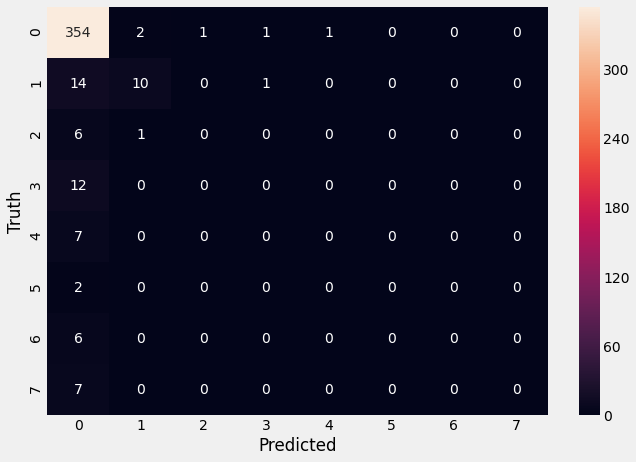

In [236]:
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test , y_pred_log)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [237]:
print(accuracy_score(y_test , y_pred_log))

0.8564705882352941


# 2. Bagging Classifier

In [238]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
model_bc = BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=8)
results_bc = cross_val_score(model_bc, x_train, y_train, cv=10)
print(results.mean())

0.8839197834645669


In [239]:
model_bc.fit(x_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=8)

In [240]:
#Predict for X test dataset
y_pred_bc = model_bc.predict(x_test)

Text(36.1, 0.5, 'Truth')

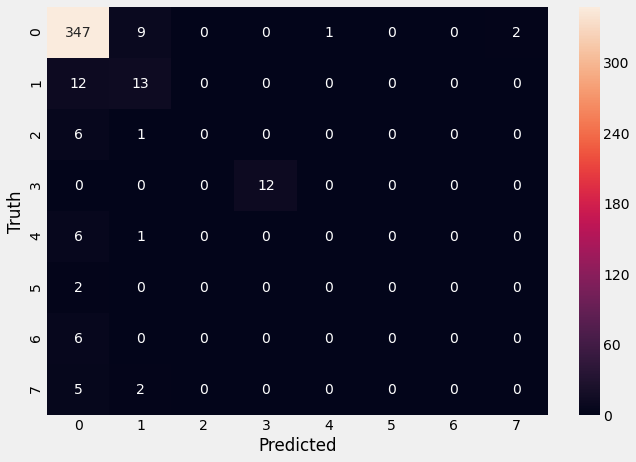

In [241]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm_bc = confusion_matrix(y_test,y_pred_bc)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_bc, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [242]:
print(accuracy_score(y_test , y_pred_bc))

0.8752941176470588


# 3. Random Forest Classification

In [190]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
num_trees = 50
model_rf = RandomForestClassifier(n_estimators = num_trees, criterion = 'entropy', random_state = 0)
results_rf = cross_val_score(model_rf, x_train, y_train, cv=10)
print(results.mean())

0.8855130413385826


In [191]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [192]:
#Predict for X dataset
y_pred_rf = model_rf.predict(x_test)

Text(36.1, 0.5, 'Truth')

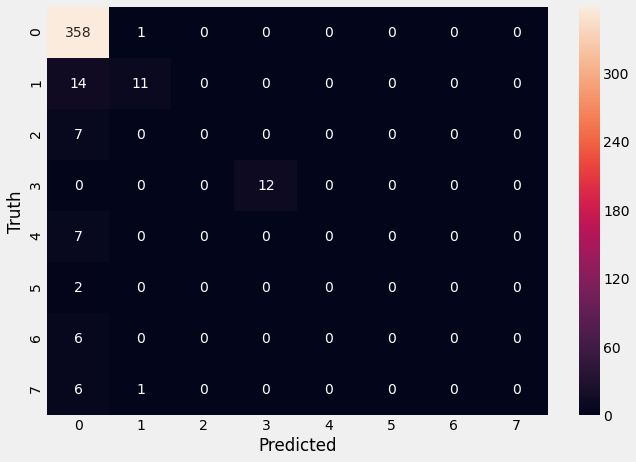

In [193]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test,y_pred_rf)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [194]:
print(accuracy_score(y_test , y_pred_rf))

0.8964705882352941


In [195]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94       359
         1.0       0.85      0.44      0.58        25
         2.0       0.00      0.00      0.00         7
         3.0       1.00      1.00      1.00        12
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         7

    accuracy                           0.90       425
   macro avg       0.34      0.30      0.32       425
weighted avg       0.83      0.90      0.86       425



# 4. KNeighbors Classifier

In [196]:
#KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors  import KNeighborsClassifier
kfold = KFold(n_splits=10)
model_knn = KNeighborsClassifier(n_neighbors = 5 , metric = "minkowski" , p = 2)
results = cross_val_score(model_knn, x_train, y_train, cv=kfold)
print(results.mean())

0.8502153051181102


In [197]:
model_knn.fit(x_train , y_train)

KNeighborsClassifier()

In [198]:
y_pred_knn  = model_knn.predict(x_test)

Text(36.1, 0.5, 'Truth')

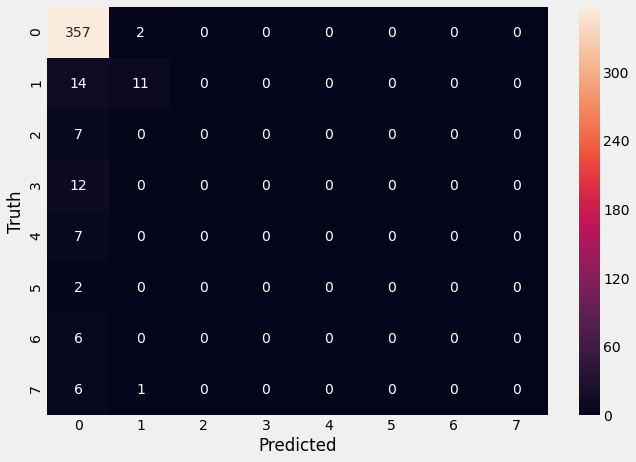

In [199]:
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_knn = confusion_matrix(y_test , y_pred_knn)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [200]:
print(accuracy_score(y_test , y_pred_knn))

0.8658823529411764


In [201]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       359
         1.0       0.79      0.44      0.56        25
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00        12
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         7

    accuracy                           0.87       425
   macro avg       0.21      0.18      0.19       425
weighted avg       0.78      0.87      0.82       425



# 5. AdaBoost Classification

In [202]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10)
model_adbc = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model_adbc, x_train, y_train, cv=kfold)
print(results.mean())

0.8642901082677165


In [203]:
model_adbc.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=7)

In [204]:
#Predict for X dataset
y_pred_adbc = model_adbc.predict(x_test)

Text(36.1, 0.5, 'Truth')

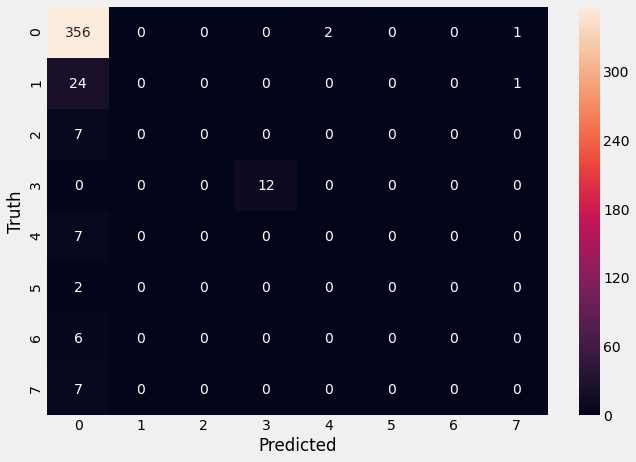

In [205]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm_adbc = confusion_matrix(y_test,y_pred_adbc)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_adbc, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [206]:
print(accuracy_score(y_test , y_pred_adbc))

0.8658823529411764


In [207]:
#Classification report
print(classification_report(y_test , y_pred_adbc))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       359
         1.0       0.00      0.00      0.00        25
         2.0       0.00      0.00      0.00         7
         3.0       1.00      1.00      1.00        12
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         7

    accuracy                           0.87       425
   macro avg       0.23      0.25      0.24       425
weighted avg       0.76      0.87      0.81       425



# 6. Stacking Ensemble Classification

In [208]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
model_ensemble = VotingClassifier(estimators)
results = cross_val_score(model_ensemble, x_train, y_train, cv=kfold)
print(results.mean())

0.8839197834645669


In [209]:
model_ensemble.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=500)),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [210]:
#Predict for X dataset
y_pred_ensemble = model_ensemble.predict(x_test)


Text(36.1, 0.5, 'Truth')

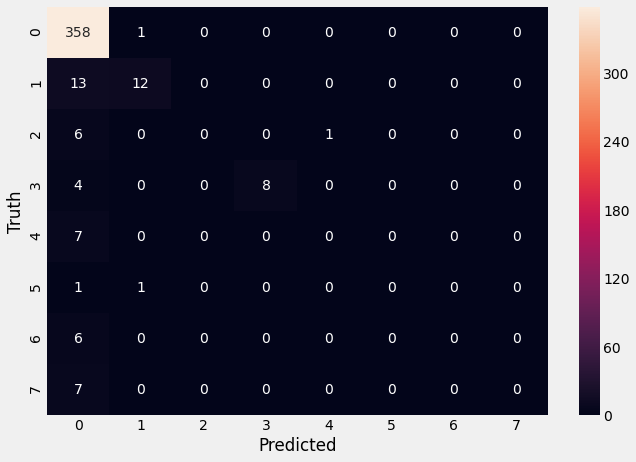

In [211]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm_ensemble = confusion_matrix(y_test,y_pred_ensemble)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [212]:
print(accuracy_score(y_test , y_pred_ensemble))

0.8894117647058823


In [213]:
#Classification report
print(classification_report(y_test , y_pred_ensemble))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       359
         1.0       0.86      0.48      0.62        25
         2.0       0.00      0.00      0.00         7
         3.0       1.00      0.67      0.80        12
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         7

    accuracy                           0.89       425
   macro avg       0.34      0.27      0.29       425
weighted avg       0.83      0.89      0.85       425



# 7. Naive Bayes Classifier

In [215]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model_gnaive = GaussianNB()
results_gnaive = cross_val_score(model_gnaive, x_train, y_train, cv=kfold)
print(results.mean())

0.8839197834645669


In [216]:
model_gnaive.fit(x_train,y_train)

GaussianNB()

In [217]:
y_pred_gnaive  = model_gnaive.predict(x_test)

Text(36.1, 0.5, 'Truth')

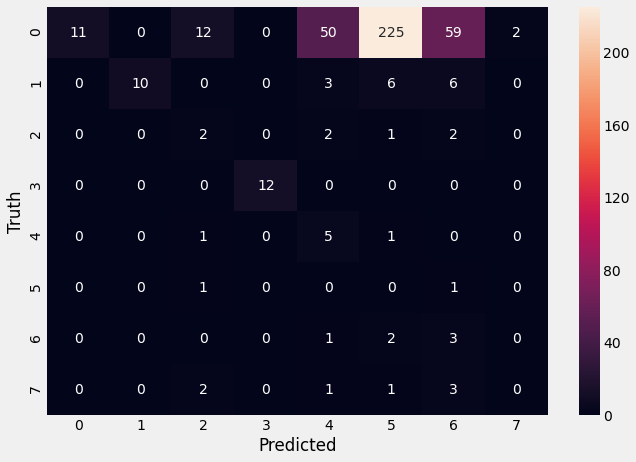

In [218]:
cm_gnaive = confusion_matrix(y_test , y_pred_gnaive)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_gnaive, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [220]:
print(accuracy_score(y_test , y_pred_gnaive))

0.1011764705882353


# 8. XG Boost Classifier

In [221]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
results_XGB = cross_val_score(model_XGB, x_train, y_train, cv=kfold)
print(results.mean())

[20:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [222]:
model_XGB.fit(x_train, y_train)

[20:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [223]:
y_pred_XGB = model_XGB.predict(x_test)

Text(36.1, 0.5, 'Truth')

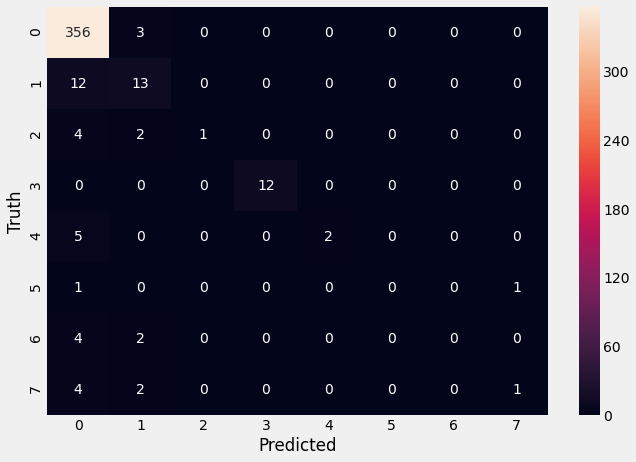

In [224]:
cm_XGB = confusion_matrix(y_test, y_pred_XGB)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_XGB, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [225]:
print(accuracy_score(y_test , y_pred_XGB))

0.9058823529411765


In [226]:
XGB_acc = cross_val_score(estimator =model_XGB,X =x_train, y= y_train, cv= 10)
print(XGB_acc.mean())

[20:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_